### Import libraries


let's start importing the libraries:

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

### Import DataFrame

and the database:

In [2]:
df=pd.read_csv(r"vgchartz-2024.csv.")

### Preliminary Analysis

preliminar look at the database, top rows:

In [12]:
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


object type of each column, we have objects and floats:

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [14]:
df.shape

(64016, 14)

we have a total of 64.016 rows and 14 columns

let's extract the list of columns:

In [16]:
df.columns

Index(['img', 'title', 'console', 'genre', 'publisher', 'developer',
       'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales',
       'other_sales', 'release_date', 'last_update'],
      dtype='object')

general statistics of each float variable  in the database:

In [15]:
df.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


analysis of Nan values across the database:

presence of Nan in each column

In [80]:
df.isna().any()

img             False
title           False
console         False
genre           False
publisher       False
developer        True
critic_score     True
total_sales      True
na_sales         True
jp_sales         True
pal_sales        True
other_sales      True
release_date     True
last_update      True
dtype: bool

graphical representation of total number of Nan values for each column:

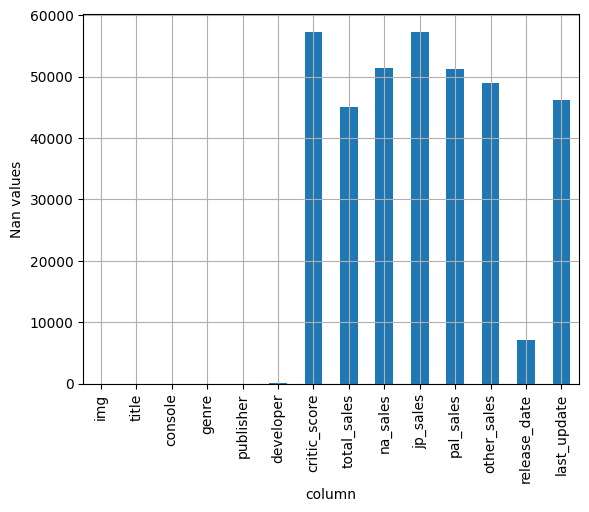

In [70]:
df.isna().sum().plot(kind="bar")
plt.xlabel("column")
plt.ylabel("Nan values")
plt.grid()
plt.show()
plt.show()

### Step 1: Transforming DataFrame

#### Example of filtering, sorting and grouping

extract title, console type and critic score, sorting by critic score

In [3]:
df.loc[0:9,["title","console","critic_score"]].sort_values("critic_score",ascending=False)

,title,console,critic_score
7,Red Dead Redemption 2,PS4,9.8
1,Grand Theft Auto V,PS4,9.7
2,Grand Theft Auto: Vice City,PS2,9.6
0,Grand Theft Auto V,PS3,9.4
6,Call of Duty: Black Ops,X360,8.8
5,Call of Duty: Modern Warfare 3,X360,8.7
8,Call of Duty: Black Ops II,X360,8.4
4,Call of Duty: Black Ops 3,PS4,8.1
9,Call of Duty: Black Ops II,PS3,8.0
3,Grand Theft Auto V,X360,NaN


show top 5 rows with critic_score>9 and console=PS2, sort by total_sales and critic_score in descending order

In [10]:
df[(df["critic_score"]>9) & (df["console"]=="PS2")].sort_values(["total_sales","critic_score"],ascending=[False,False]).head(5)

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
13,/games/boxart/3570928ccc.jpg,Grand Theft Auto III,PS2,Action,Rockstar Games,DMA Design,9.5,13.10,6.99,0.30,4.51,1.30,2001-10-23,NaN
75,/games/boxart/1473680ccc.jpg,Madden NFL 2004,PS2,Sports,EA Sports,EA Tiburon,9.5,5.23,4.26,0.01,0.26,0.71,2003-08-12,NaN
80,/games/boxart/full_2486879AmericaFrontccc.jpg,Guitar Hero II,PS2,Misc,RedOctane,Harmonix Music Systems,9.2,5.12,3.81,NaN,0.63,0.68,2006-11-07,NaN
94,/games/boxart/full_727567AmericaFrontccc.jpg,Madden NFL 06,PS2,Sports,EA Sports,EA Tiburon,9.1,4.91,3.98,0.01,0.26,0.66,2005-08-08,NaN


show top 10 rows with console=PS2 or XBOX360, and genre action, and sort them based on total_sales in descending order

In [18]:
df[(df["console"].isin(["PS2","XBOX360"]))&(df["genre"]=="Action")].sort_values("total_sales",ascending=False).head(10)

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
13,/games/boxart/3570928ccc.jpg,Grand Theft Auto III,PS2,Action,Rockstar Games,DMA Design,9.5,13.10,6.99,0.30,4.51,1.30,2001-10-23,NaN
105,/games/boxart/8307809ccc.jpg,The Lord of the Rings: The Two Towers,PS2,Action,Electronic Arts,Stormfront Studios,8.3,4.67,1.94,0.08,1.95,0.70,2002-10-21,NaN
115,/games/boxart/full_9484527AmericaFrontccc.jpg,Spider-Man: The Movie,PS2,Action,Activision,Treyarch,8.2,4.48,2.71,0.03,1.51,0.23,2002-04-15,NaN
187,/games/boxart/9254920ccc.jpg,The Getaway,PS2,Action,Sony Computer Entertainment,Team Soho,7.7,3.54,1.23,0.05,1.77,0.49,2003-01-19,NaN
189,/games/boxart/full_1027141AmericaFrontccc.jpg,Grand Theft Auto: Liberty City Stories,PS2,Action,Rockstar Games,Rockstar Leeds,8.3,3.54,1.56,0.07,1.40,0.50,2006-06-06,NaN
194,/games/boxart/full_6469736AmericaFrontccc.jpg,LEGO Star Wars: The Video Game,PS2,Action,Eidos Interactive,Traveller's Tales,7.9,3.53,1.98,0.01,1.14,0.41,2005-04-02,NaN
212,/games/boxart/4171363ccc.jpg,Spider-Man 2,PS2,Action,Activision,Treyarch,7.9,3.41,1.75,0.02,1.20,0.43,2004-06-28,NaN
222,/games/boxart/full_5479051AmericaFrontccc.jpg,Star Wars Episode III: Revenge of the Sith,PS2,Action,LucasArts,The Collective,NaN,3.32,1.47,0.03,1.39,0.43,2005-05-04,NaN
225,/games/boxart/3546885ccc.jpg,The Lord of the Rings: The Return of the King,PS2,Action,Electronic Arts,"Hypnos Entertainment, Inc.",8.4,3.28,1.50,0.05,1.28,0.46,2003-11-05,NaN


add new column, concatenating the column developer with the column title

In [29]:
df["new title"]=df["developer"]+" - "+df["title"]
df

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,mean_score,new title
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN,Rockstar North Grand Theft Auto V,Rockstar North - Grand Theft Auto V
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03,Rockstar North Grand Theft Auto V,Rockstar North - Grand Theft Auto V
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN,Rockstar North Grand Theft Auto: Vice City,Rockstar North - Grand Theft Auto: Vice City
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN,Rockstar North Grand Theft Auto V,Rockstar North - Grand Theft Auto V
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14,Treyarch Call of Duty: Black Ops 3,Treyarch - Call of Duty: Black Ops 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28,Arc System Works XBlaze Lost: Memories,Arc System Works - XBlaze Lost: Memories
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09,"Nippon Ichi Software Yoru, Tomosu","Nippon Ichi Software - Yoru, Tomosu"
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09,"Nippon Ichi Software Yoru, Tomosu","Nippon Ichi Software - Yoru, Tomosu"
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24,Otomate Yunohana SpRING! ~Mellow Times~,Otomate - Yunohana SpRING! ~Mellow Times~


### Step 2: Aggregating DataFrame


pring min, max and mean critic score on screen

In [106]:
print("Min of critical score: "+str(df["critic_score"].min()))
print("Max of critical score: "+str(df["critic_score"].max()))
print("Mean of critical score: "+str(df["critic_score"].mean()))

Min of critical score: 1.0
Max of critical score: 10.0
Mean of critical score: 7.220440251572328


show percentage of rows based on console, we see that PC constituites almost 20% of the database

In [19]:
df["console"].value_counts(sort=True,normalize=True).head(10)

console
PC      0.197091
PS2     0.055689
DS      0.051362
PS4     0.044958
PS      0.042286
NS      0.036506
XBL     0.033117
PSN     0.031305
XOne    0.030664
PS3     0.029758
Name: proportion, dtype: float64

group by publisher and console, and calculate total sales. We see that Activision registered best sales for the X360 and PS3 consoles

In [20]:
df.groupby(["publisher","console"])["total_sales"].sum().sort_values(ascending=False).head(10)

publisher                    console
Activision                   X360       149.47
                             PS3        121.65
EA Sports                    PS2        114.50
Electronic Arts              PS2        108.52
Sony Computer Entertainment  PS2         98.84
Electronic Arts              X360        91.37
                             PS3         86.87
Sony Computer Entertainment  PS          86.73
Activision                   PS4         84.29
                             PS2         83.57
Name: total_sales, dtype: float64

group by consoles and calculate total sales. We see that the PS2 is the best selling console in terms of games sold

In [21]:
df.groupby("console")["total_sales"].sum().sort_values(ascending=False).head(10)



console
PS2     1027.76
X360     859.79
PS3      839.70
PS       546.25
PS4      539.92
Wii      459.44
DS       458.17
XOne     268.96
PSP      245.29
XB       232.05
Name: total_sales, dtype: float64

### Step 3: Plot

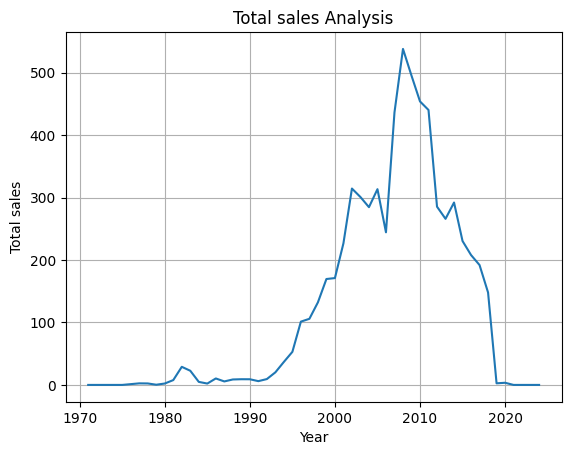

In [69]:
df["release_date"]=pd.to_datetime(df["release_date"], format='%Y-%m-%d')
data=df.groupby(df.release_date.dt.year)["total_sales"].sum()
plt.plot(data.index,data.values)
plt.xlabel("Year")
plt.ylabel("Total sales")
plt.title("Total sales Analysis")
plt.grid()
plt.show()
plt.show()

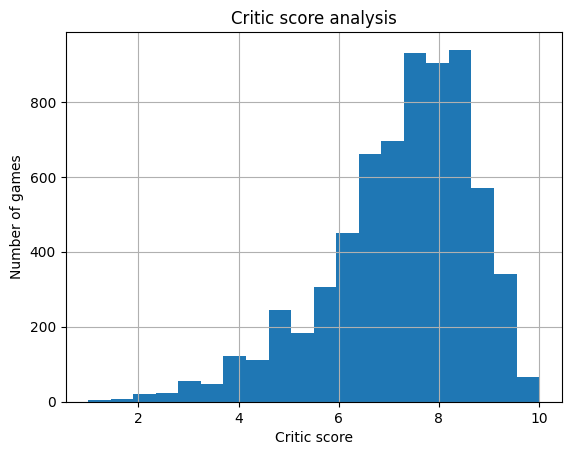

In [17]:
data=df["critic_score"]

plt.hist(data,bins=20)
plt.grid()
plt.xlabel("Critic score")
plt.ylabel("Number of games")
plt.title("Critic score analysis")
 

plt.show()

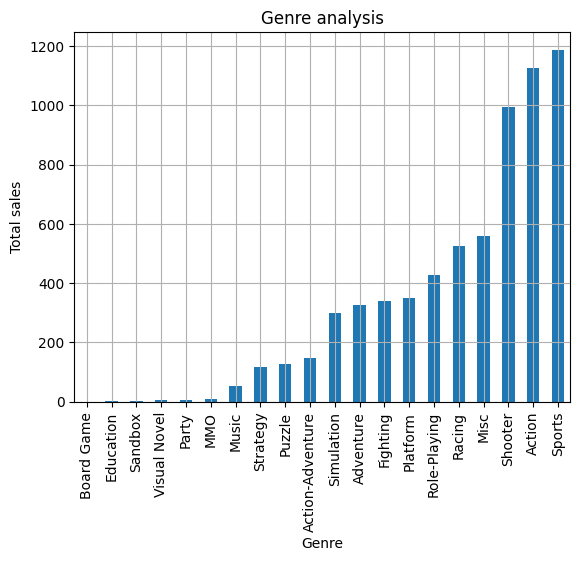

In [18]:
mean_sales=df.groupby("genre")["total_sales"].sum().sort_values()
mean_sales.plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Total sales")
plt.title("Genre analysis")
plt.grid()
plt.show()

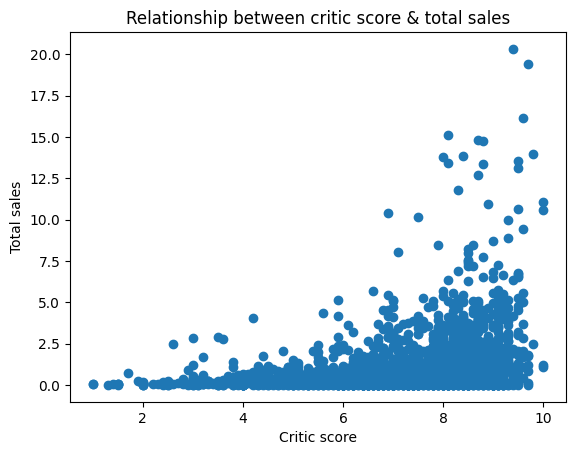

In [19]:
plt.scatter(df["critic_score"],df["total_sales"])
plt.xlabel("Critic score")
plt.ylabel("Total sales")
plt.title("Relationship between critic score & total sales")
plt.show()

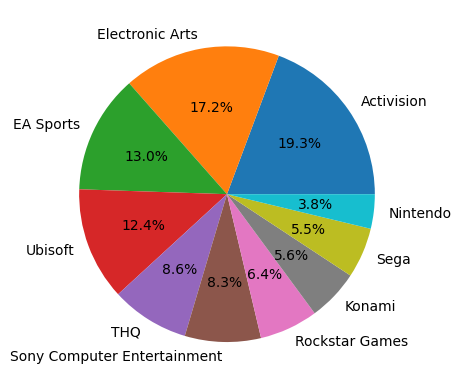

In [22]:
data=df.groupby("publisher")["total_sales"].sum().sort_values(ascending=False).head(10)

plt.pie(data,labels=data.index,autopct='%1.1f%%')
plt.show() 
